In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv("data.csv",encoding='gbk')
print(data.shape)
data.head()

(4754, 90)


,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


In [8]:

data.rename(columns={'Unnamed: 0':'uname'},inplace=True)#df.rename(columns={"A": "a", "B": "c"})
data.columns

Index(['uname', 'custid', 'trade_no', 'bank_card_no', 'low_volume_percent',
       'middle_volume_percent', 'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'trans_activity_month',
       'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter',
       'trans_days_interval', 'regional_mobility', 'student_feature',
       'repayment_capability', 'is_high_user', 'number_of_trans_from_2011',
       'first_transaction_time', 'historical_trans_amount',
       'historical_trans_day', 'rank_trad_1_month', 'trans_amount_3_month',
       'avg_consume_less_12_valid_month', 'abs',
       'top_trans_count_last_1_month', 'avg_price_last_12_month',
       'avg_price_top_last_12_valid_month', 'reg_preference_for_trad',
       'trans_top_time_last_1_month', 'trans_top_time_last_6_month',
       'consume_top_time_last_1_month', 'consume_top_time_last_6_month',
       'cross_consume_count_last_1_month',
       'trans_fail_top_count_enum_last_1_month',
       '

In [11]:
data['bank_card_no']=data['bank_card_no'].replace('卡号1',1)
data['bank_card_no'].unique()

array([1], dtype=int64)

In [16]:
for col in data.columns:
    if data[col].dtypes=="object":
        print(col,data[col].unique())

trade_no ['20180507115231274000000023057383' '20180507121002192000000023073000'
 '20180507125159718000000023114911' ... '20180507121340509000000388278785'
 '20180504161827128000000381357758' '20180507124243041000000388391027']
reg_preference_for_trad ['一线城市' '三线城市' '境外' '二线城市' '其他城市' nan]
source ['xs']
id_name ['蒋红' '崔向朝' '王中云' ... '胡晓歆宇' '赵吉伟' '罗松']
latest_query_time ['2018-04-25' '2018-05-03' '2018-05-05' '2018-04-15' '2018-05-04'
 '2018-05-06' nan '2018-04-13' '2018-04-16' '2018-04-06' '2018-03-30'
 '2018-04-24' '2018-04-21' '2018-04-28' '2018-04-11' '2018-04-30'
 '2018-04-23' '2018-04-27' '2018-04-17' '2018-05-02' '2017-12-03'
 '2018-04-14' '2018-04-12' '2018-03-16' '2018-04-19' '2018-03-28'
 '2018-03-08' '2018-04-04' '2018-04-29' '2018-05-01' '2018-01-09'
 '2018-04-09' '2018-04-02' '2018-04-08' '2018-04-22' '2018-03-27'
 '2018-04-18' '2018-03-25' '2018-04-10' '2018-03-15' '2018-03-17'
 '2018-02-07' '2018-03-04' '2017-12-22' '2018-04-20' '2018-04-05'
 '2018-04-26' '2018-04-07' '201

In [17]:
stats = []
for col in data.columns:
    stats.append((col, data[col].nunique(), data[col].isnull().sum() * 100 / data.shape[0], data[col].value_counts(normalize=True, dropna=False).values[0] * 100, data[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)[:10]

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
14,student_feature,2,63.062684,63.062684,float64
33,cross_consume_count_last_1_month,19,8.960875,64.535128,float64
58,latest_six_month_apply,65,6.394615,6.394615,float64
56,latest_one_month_apply,36,6.394615,17.522087,float64
55,latest_query_time,207,6.394615,8.897770,object
54,query_sum_count,74,6.394615,6.394615,float64
53,query_cash_count,17,6.394615,15.649979,float64
52,query_finance_count,25,6.394615,11.190576,float64
51,query_org_count,46,6.394615,6.394615,float64
50,apply_credibility,41,6.394615,11.022297,float64


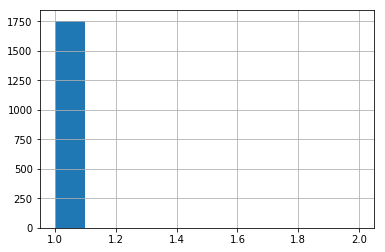

In [18]:
data['student_feature'].hist()